<a href="https://colab.research.google.com/github/Loedpipat/Senior_Project/blob/main/6432149821_IoT_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6432149821_IoT_Project3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load data
data = pd.read_csv("Output24.csv")
df = pd.DataFrame(data)

In [ ]:
# Display the first few rows and the data types
data.head()
df.dtypes

,0
time,object
humidity,float64
temperature,float64


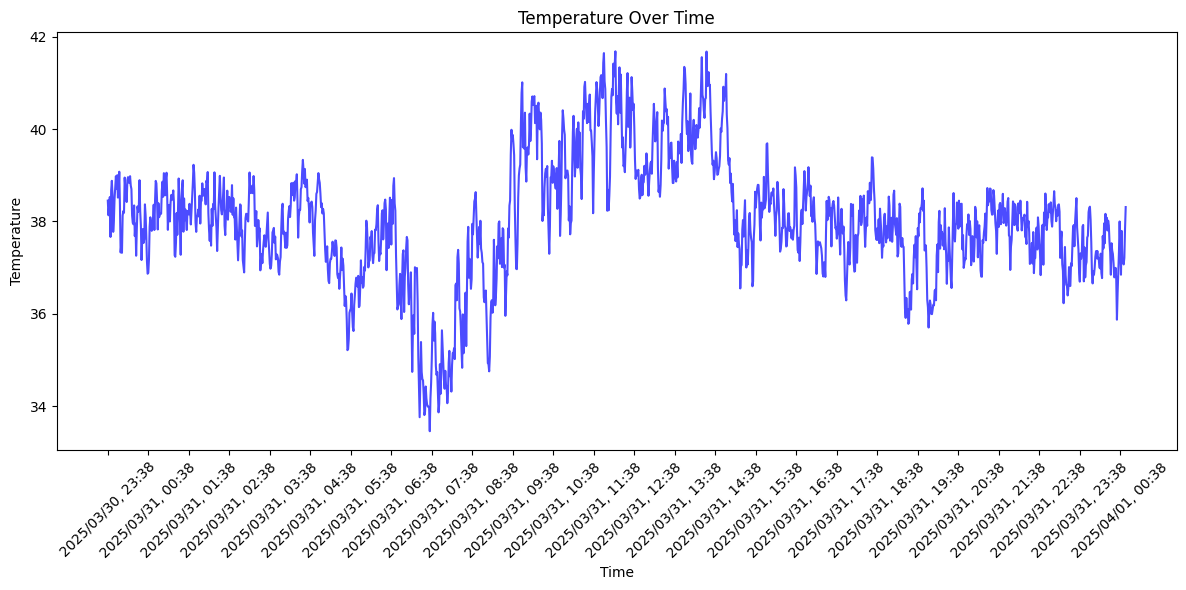

In [ ]:
# Convert the 'time' column to datetime type
data["time"] = pd.to_datetime(data["time"], format="%d/%m/%Y %H:%M")

# Format the time to display in a more readable format (YYYY/MM/DD HH:MM)
x_format = data["time"].dt.strftime('%Y/%m/%d, %H:%M')

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(x_format, data['temperature'], label='Temperature', color='blue', alpha=0.7)

# Adding labels and title
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')

# Set x-ticks to show a label for every 60 data points
plt.xticks(range(0, len(x_format), 60), x_format[::60], rotation=45)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Shift the 'temperature' column to create features for the previous 5 measurements (for 5 minutes)
for i in range(1, 6):  # Use 5 previous data points for 5 minutes
    data[f'temp_{i}'] = data['temperature'].shift(i)

# For 50 minutes previous data
for i in range(1, 51):  # Use 50 previous data points for 50 minutes
    data[f'temp_50_{i}'] = data['temperature'].shift(i)

# Drop rows with NaN values due to the shift operation
prepared_data_5 = data.dropna(subset=[f'temp_{i}' for i in range(1, 6)]).reset_index(drop=True)
prepared_data_50 = data.dropna(subset=[f'temp_50_{i}' for i in range(1, 51)]).reset_index(drop=True)

# Define features (X) and target (y)
X_5 = prepared_data_5[[f'temp_{i}' for i in range(1, 6)]]
y_5 = prepared_data_5['temperature']

X_50 = prepared_data_50[[f'temp_50_{i}' for i in range(1, 51)]]
y_50 = prepared_data_50['temperature']

# Split the data into training and testing sets (80:20)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.2, random_state=42)

# Train Models (SVR and Linear Regression)

# Train SVR Model on 5-minute data
svr_5 = SVR()
svr_5.fit(X_train_5, y_train_5)
y_pred_svr_5 = svr_5.predict(X_test_5)

# Train SVR Model on 50-minute data
svr_50 = SVR()
svr_50.fit(X_train_50, y_train_50)
y_pred_svr_50 = svr_50.predict(X_test_50)

# Train Linear Regression Model on 5-minute data
lr_5 = LinearRegression()
lr_5.fit(X_train_5, y_train_5)
y_pred_lr_5 = lr_5.predict(X_test_5)

# Train Linear Regression Model on 50-minute data
lr_50 = LinearRegression()
lr_50.fit(X_train_50, y_train_50)
y_pred_lr_50 = lr_50.predict(X_test_50)

# Evaluate Models (MAE and RMSE)

# SVR evaluation
mae_svr_5 = mean_absolute_error(y_test_5, y_pred_svr_5)
rmse_svr_5 = np.sqrt(mean_squared_error(y_test_5, y_pred_svr_5))

mae_svr_50 = mean_absolute_error(y_test_50, y_pred_svr_50)
rmse_svr_50 = np.sqrt(mean_squared_error(y_test_50, y_pred_svr_50))

mae_lr_5 = mean_absolute_error(y_test_5, y_pred_lr_5)
rmse_lr_5 = np.sqrt(mean_squared_error(y_test_5, y_pred_lr_5))

mae_lr_50 = mean_absolute_error(y_test_50, y_pred_lr_50)
rmse_lr_50 = np.sqrt(mean_squared_error(y_test_50, y_pred_lr_50))

# Print MAE and RMSE for all models
print(f"SVR (5 min) MAE: {mae_svr_5}, RMSE: {rmse_svr_5}")
print(f"SVR (50 min) MAE: {mae_svr_50}, RMSE: {rmse_svr_50}")
print(f"LR (5 min) MAE: {mae_lr_5}, RMSE: {rmse_lr_5}")
print(f"LR (50 min) MAE: {mae_lr_50}, RMSE: {rmse_lr_50}")


SVR (5 min) MAE: 0.3605937030180988, RMSE: 0.45207044201974966
SVR (50 min) MAE: 0.3920894179917121, RMSE: 0.4998213770625464
LR (5 min) MAE: 0.3552267232302215, RMSE: 0.44428159723878413
LR (50 min) MAE: 0.3737771246482578, RMSE: 0.47277540931829476


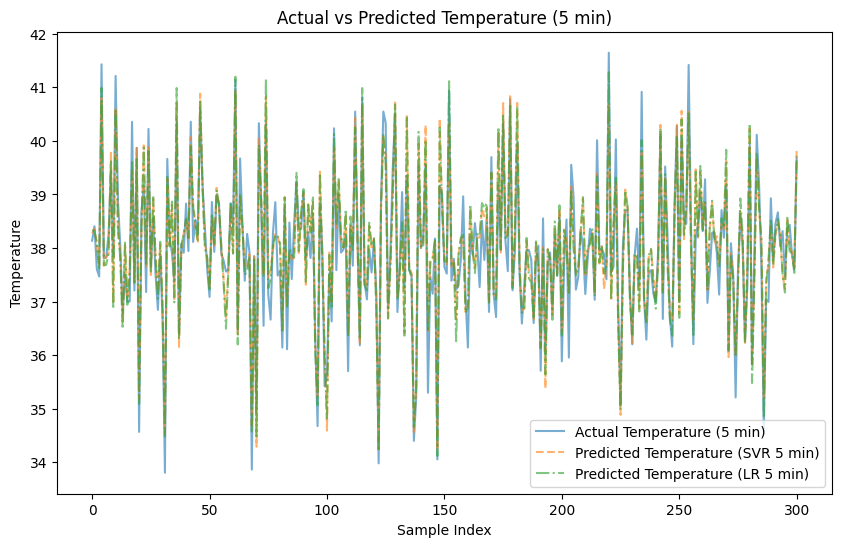

In [ ]:
# Visualization for the test set only
plt.figure(figsize=(10, 6))
plt.plot(y_test_5.reset_index(drop=True), label='Actual Temperature (5 min)', alpha=0.6)
plt.plot(y_pred_svr_5, label='Predicted Temperature (SVR 5 min)', alpha=0.6, linestyle='--')
plt.plot(y_pred_lr_5, label='Predicted Temperature (LR 5 min)', alpha=0.6, linestyle='-.')
plt.title('Actual vs Predicted Temperature (5 min)')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
# Optional LSTM Model for Prediction

# Reshape the data for LSTM (needs to be 3D)
X_train_5_lstm = np.array(X_train_5).reshape((X_train_5.shape[0], X_train_5.shape[1], 1))
X_test_5_lstm = np.array(X_test_5).reshape((X_test_5.shape[0], X_test_5.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_5_lstm.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
lstm_model.fit(X_train_5_lstm, y_train_5, epochs=10, batch_size=32, verbose=2)

# Predictions with LSTM
y_pred_lstm = lstm_model.predict(X_test_5_lstm)

# LSTM Evaluation
mae_lstm = mean_absolute_error(y_test_5, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_5, y_pred_lstm))

# Print MAE and RMSE for LSTM
print(f"LSTM MAE: {mae_lstm}, RMSE: {rmse_lstm}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 - 3s - 77ms/step - loss: 77.8124
Epoch 2/10
38/38 - 0s - 6ms/step - loss: 0.5370
Epoch 3/10
38/38 - 0s - 5ms/step - loss: 0.3286
Epoch 4/10
38/38 - 0s - 5ms/step - loss: 0.3275
Epoch 5/10
38/38 - 0s - 8ms/step - loss: 0.3284
Epoch 6/10
38/38 - 0s - 5ms/step - loss: 0.3270
Epoch 7/10
38/38 - 0s - 5ms/step - loss: 0.3259
Epoch 8/10
38/38 - 0s - 7ms/step - loss: 0.3293
Epoch 9/10
38/38 - 0s - 8ms/step - loss: 0.3227
Epoch 10/10
38/38 - 0s - 5ms/step - loss: 0.3235
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM MAE: 0.44566201080632906, RMSE: 0.5685947158396297


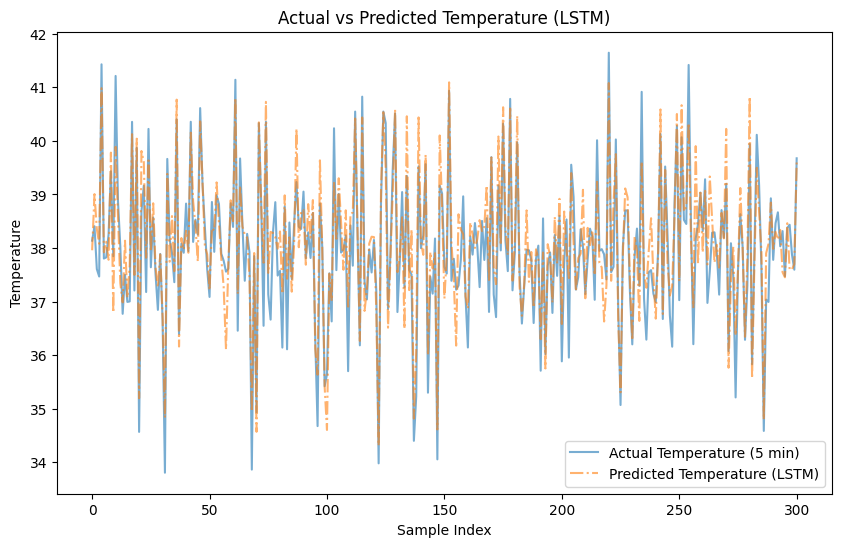

In [ ]:
# Visualization for LSTM results
plt.figure(figsize=(10, 6))
plt.plot(y_test_5.reset_index(drop=True), label='Actual Temperature (5 min)', alpha=0.6)
plt.plot(y_pred_lstm, label='Predicted Temperature (LSTM)', alpha=0.6, linestyle='-.')
plt.title('Actual vs Predicted Temperature (LSTM)')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()